In [0]:
# Selecting TensorFlow Version 2
%tensorflow_version 2.x
#!pip show tensorflow

In [0]:
# Importing all the required libraries
import cv2
import os
import glob
import random
import pickle
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
from matplotlib import gridspec

In [67]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
common_path = './gdrive/My Drive/Colab Notebooks/Traffic Sign Classifier/'
# Testing Image data directory
test_image_dir = common_path + 'Testing Images'

In [0]:
# Loading the saved trained model
model = tf.keras.models.load_model(os.path.join(common_path, 'TensorFlow Models/cnn_model-10-epochs.h5'))

In [0]:
# Reading the csv file which contains the various traffic sign names
data = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Traffic Sign Classifier/DataSets/signnames.csv')

In [71]:
data.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [0]:
np.random.seed(0)

# Loading Test Data
with open('./gdrive/My Drive/Colab Notebooks/Traffic Sign Classifier/DataSets/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [73]:
# Splitting out features and labels
x_test, y_test = test_data['features'], test_data['labels']

# Shape of a Traffic Sign Image
image_shape = x_test[0].shape

# Number of different classes available
num_classes = np.unique(y_test).shape[0]

# Checking for the number of datasets available
print("Number of Test Datas       : ", x_test.shape[0])

# Displaying the Image Shape and No. of Classes available
print("Shape of Image Data        : ", image_shape)
print("Number of Classes          : ", num_classes)

Number of Test Datas       :  12630
Shape of Image Data        :  (32, 32, 3)
Number of Classes          :  43


In [0]:
# Checking for the balanced dataset

# Check whether the no. of images is equal to the no. of  labels or not
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."

# Check whether the dimensions of the images are 32 * 32 * 3 or not
assert(x_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [0]:
# Converting an image to gray image
def grayscale(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

In [0]:
# Histogram Equalization improves the contrast in an image, in order to stretch out the intensity range.
def equalize(image):
  image = cv2.equalizeHist(image)
  return image

In [0]:
# Resize Image to the required dimension
def resize_image(image):
  image = cv2.resize(image, (32, 32))
  return image

In [0]:
# Image Preprocessing Function
def image_preprocess(image):
  
  image = grayscale(image)
  image = equalize(image)
  image = resize_image(image)
  
  # Normalizing image
  image = image/255

  return image

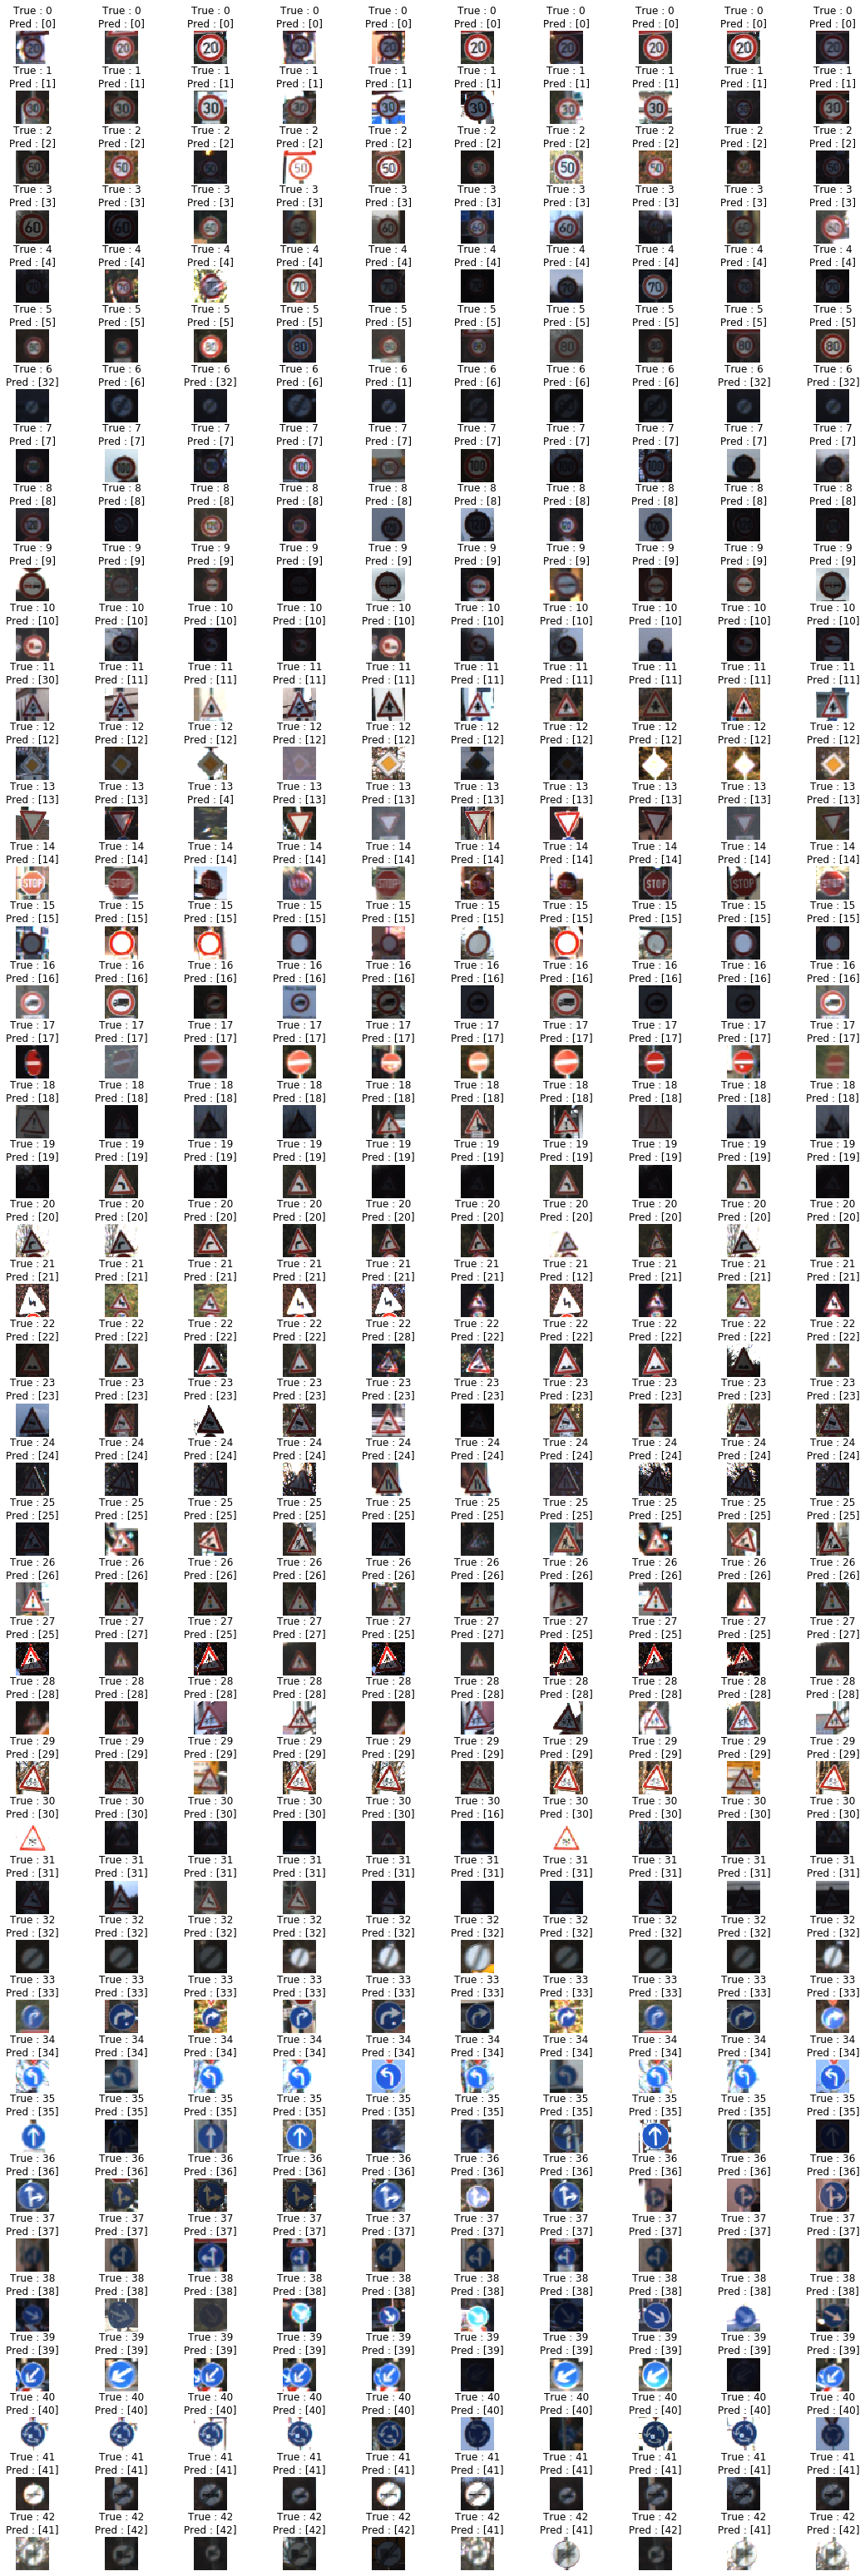

In [79]:
fig, axs = plt.subplots(nrows = num_classes, ncols = 10, figsize = (15, 43))
fig.tight_layout()
# Displaying 10 samples for each class along with the true and predicted class
for j, row in data.iterrows():
  
  # Selecting the data with class 'j'
  x_selected = x_test[y_test == j]
  
  # Displaying 10 random samples for each class
  for i in range(10):
    rand_num = random.randint(0,(len(x_selected) - 1))
    image = x_selected[rand_num, :, :]
    axs[j][i].imshow(image)
    image = image_preprocess(image)
    image = image.reshape(1, 32, 32, 1)
    axs[j][i].set_title("True : {}\nPred : {}".format(j, model.predict_classes(image)))
    axs[j][i].axis("off")

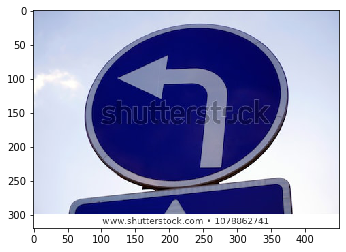

In [80]:
# Loading a traffic sign image from an URL and predicting the sign
url = 'https://image.shutterstock.com/display_pic_with_logo/177667634/1078862741/stock-photo-left-turn-road-sign-over-blue-sky-1078862741.jpg'
r = requests.get(url, stream=True)
image = Image.open(r.raw)
plt.imshow(image)

Predicted Sign and Label :  Speed limit (80km/h) - 5


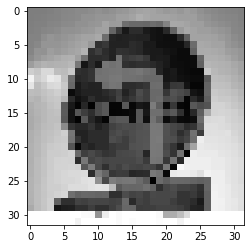

In [81]:
image = np.asarray(image)
image = image_preprocess(image)
plt.imshow(image, cmap = 'gray')
# Reshaping to the desired input format to the model
image = image.reshape(1, 32, 32, 1)

print("Predicted Sign and Label : ", data.iat[int(model.predict_classes(image)), 1], "-", int(model.predict_classes(image)))

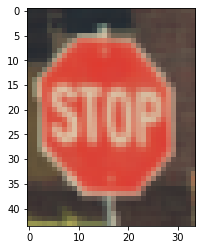

In [82]:
# Loading a traffic sign image from the GDrive and predicting the sign
img = Image.open(r'./gdrive/My Drive/Colab Notebooks/Traffic Sign Classifier/Testing Images/w.PNG')
plt.imshow(img)

Predicted Sign and Label :  Stop - 14


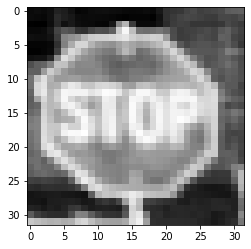

In [83]:
img = np.asarray(img)
img = image_preprocess(img)
plt.imshow(img, cmap = 'gray')
# Reshaping to the desired input format to the model
img = img.reshape(1, 32, 32, 1)

print("Predicted Sign and Label : ", data.iat[int(model.predict_classes(img)), 1], "-", int(model.predict_classes(img)))

In [0]:
common_path = './gdrive/My Drive/Colab Notebooks/Traffic Sign Classifier/'
# Testing Image data directory
test_image_dir = common_path + 'Testing Images'

In [0]:
# Function to load data into an array
def load_dataset(image_dir):
  
  data = []
  # Iterating through each '*.jpg' file
  for file in glob.glob(os.path.join(image_dir, '*')):
    image = mpimg.imread(file, 0)
    
    # Changing the 4 channel image to 3 channel 
    if image.shape[2] != 3:
      image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB) 

    if not image is None:
      data.append(image_preprocess(image))
      
  return data

In [0]:
# Loading the testing images into an array
loaded_data = load_dataset(test_image_dir)

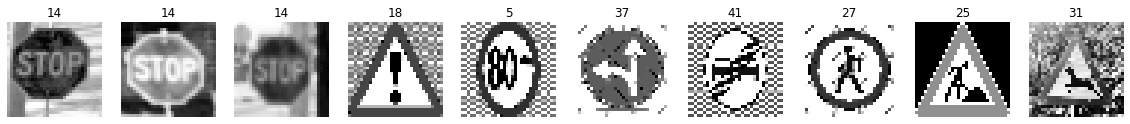

In [87]:
fig, axs = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 10))

# Manually annotating labels for these Testing Images
target_labels = [14, 14, 14, 18, 5, 37, 41, 27, 25, 31]

# Loop for displaying the Testing Images alang with annotated class
for i, axs in enumerate(axs.ravel()):
  axs.imshow(loaded_data[i], cmap = 'gray')
  axs.set_title('{}'.format(target_labels[i]))
  axs.axis("off")

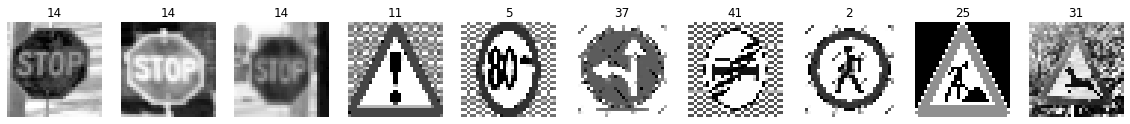

In [88]:
# Prediction for the Testing Images
fig, axs = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 10))

loaded_data = np.asarray(loaded_data)
loaded_data_reshaped = loaded_data.reshape(len(loaded_data), 32, 32, 1)

predicted_class = model.predict_classes(loaded_data_reshaped)

# Loop for displaying the Testing Images along with predicted class
for i, axs in enumerate(axs.ravel()):
  axs.imshow(loaded_data[i], cmap = 'gray')
  axs.set_title('{}'.format(int(predicted_class[i])))
  axs.axis("off")

In [89]:
# Getting the accuracy for the loaded_data
count = 0
for i, pred in enumerate(predicted_class):
  print('Image {} - Target Label = {:02d}, Predicted Label = {:02d}'.format(i, target_labels[i], pred))
  if target_labels[i] == pred:
    count = count + 1
    
print('\nAccuracy for the Testing Images : {:.02f} %'.format(count/len(target_labels) * 100))

Image 0 - Target Label = 14, Predicted Label = 14
Image 1 - Target Label = 14, Predicted Label = 14
Image 2 - Target Label = 14, Predicted Label = 14
Image 3 - Target Label = 18, Predicted Label = 11
Image 4 - Target Label = 05, Predicted Label = 05
Image 5 - Target Label = 37, Predicted Label = 37
Image 6 - Target Label = 41, Predicted Label = 41
Image 7 - Target Label = 27, Predicted Label = 02
Image 8 - Target Label = 25, Predicted Label = 25
Image 9 - Target Label = 31, Predicted Label = 31

Accuracy for the Testing Images : 80.00 %


In [90]:
# Getting the probability for each class
predictions = model.predict(loaded_data_reshaped)
print(predictions)

[[8.23237485e-12 9.72874559e-10 6.54751773e-08 8.60623786e-08
  5.72714515e-11 2.98160718e-09 1.52292328e-12 6.59314594e-08
  7.80798700e-07 4.42743758e-10 4.07640535e-14 9.21653755e-15
  5.31205657e-09 1.23445957e-07 9.99998808e-01 4.80707740e-09
  9.94953784e-15 1.67761960e-09 2.02104948e-13 3.42240850e-17
  2.16539005e-12 5.84198539e-15 8.65670716e-17 6.54305556e-17
  1.72509762e-14 3.16183444e-15 7.42097876e-12 1.84713848e-17
  3.96892241e-12 4.34714981e-13 1.57208068e-13 2.42701313e-13
  2.16595600e-12 1.94197075e-10 1.84018824e-11 1.47655929e-10
  5.83971280e-15 2.25508758e-16 9.25922450e-09 7.90089438e-10
  3.67974829e-14 2.58132427e-14 5.00343288e-17]
 [3.35547855e-22 2.84504603e-20 9.30183922e-17 8.62261499e-15
  2.07423969e-16 3.37193725e-17 1.65464348e-23 7.15033186e-16
  6.71389417e-14 9.01958206e-15 2.51299619e-20 3.00339147e-24
  2.67538623e-13 7.17291573e-11 1.00000000e+00 7.34761441e-14
  8.96668954e-21 3.45938694e-10 1.30694133e-21 4.83057348e-25
  4.68435806e-20 5.004

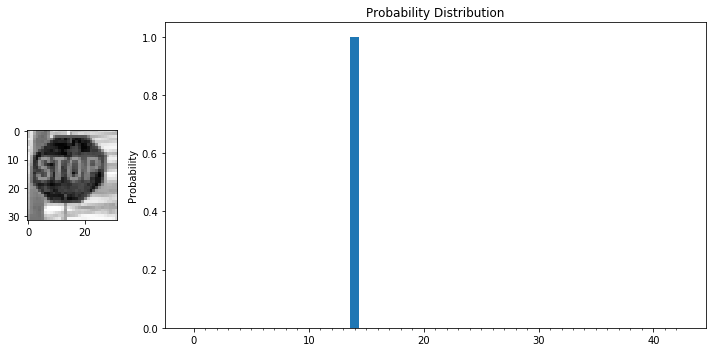

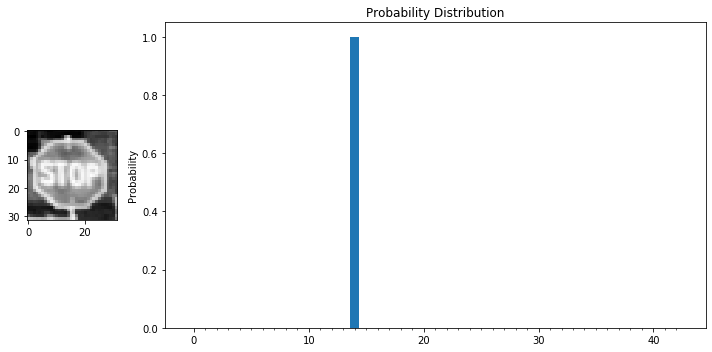

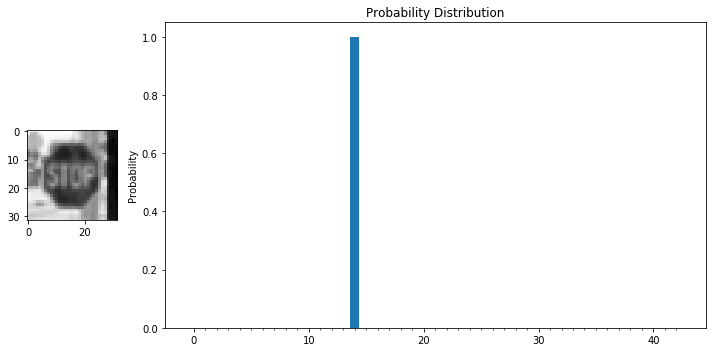

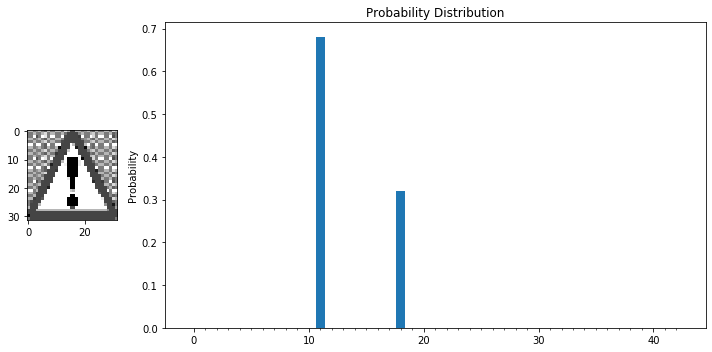

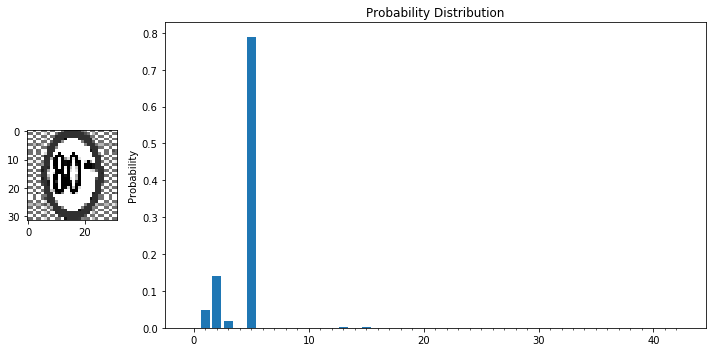

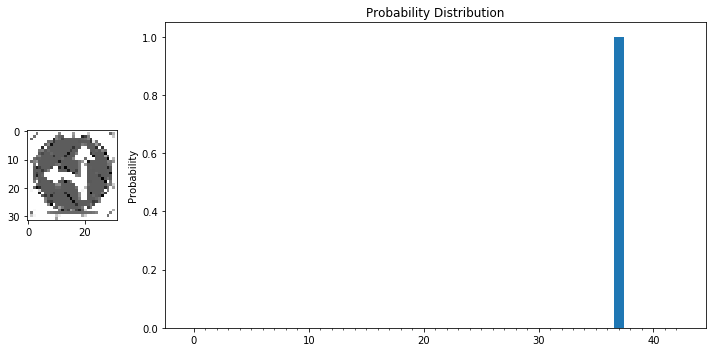

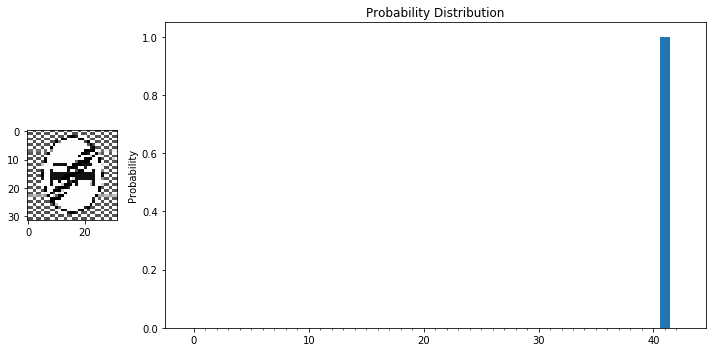

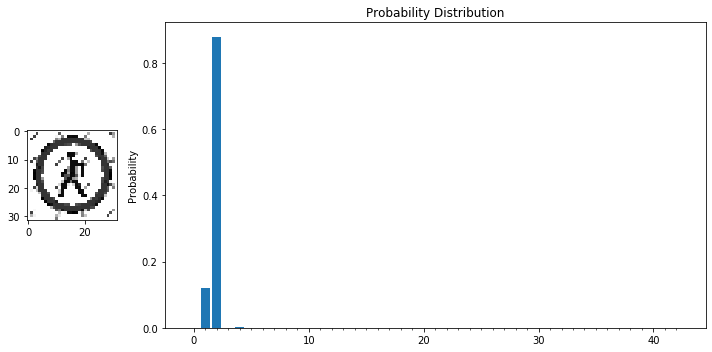

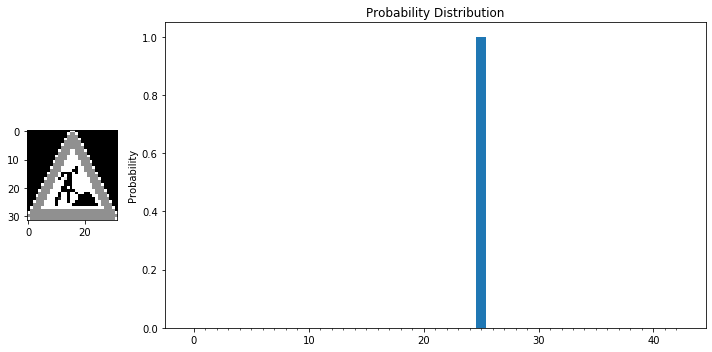

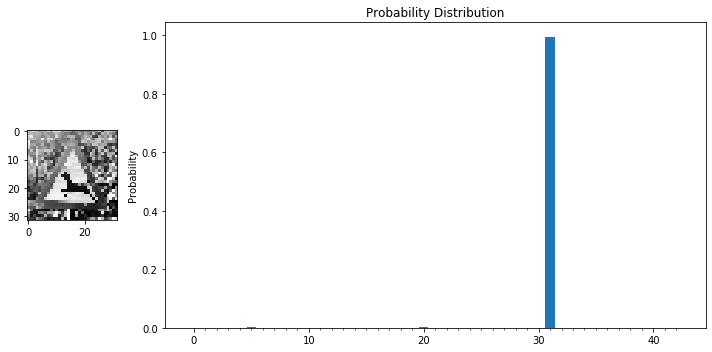

In [91]:
# Showing the traffic sign image along with the probability distribution
y_pos = np.arange(len(predictions[0]))
xtick = [str(i) for i in range(len(predictions[0]))]

for i in range(len(loaded_data)):
    fig = plt.figure(figsize=(10, 5)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(loaded_data[i], cmap='gray')
    ax1 = plt.subplot(gs[1])
    ax1.bar(y_pos, predictions[i], align='center', alpha=1)
    ax1.set_xticks(y_pos, xtick)
    ax1.set_ylabel('Probability')
    ax1.set_title('Probability Distribution')
    plt.tight_layout()
    plt.show()